In [6]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import glob

In [7]:
#Get and prepare all the data
aggr_files = []
normal_files = []
for i in range(1,5):   
    path_aggr = r'C:/Users/johan/ML1/ML1_Repo/Sheet2/EMG Physical Action Data Set/sub'+str(i)+'/Aggressive/txt'                    
    aggr_files.extend(glob.glob(os.path.join(path_aggr, "*.txt")))
    path_normal = r'C:/Users/johan/ML1/ML1_Repo/Sheet2/EMG Physical Action Data Set/sub'+str(i)+'/Normal/txt'   
    normal_files.extend(glob.glob(os.path.join(path_normal, "*.txt")))

df_from_each_aggr_file = (pd.read_table(f, names=list(range(8))) for f in aggr_files)
aggr_df = pd.concat(df_from_each_aggr_file, ignore_index=True)

df_from_each_normal_file = (pd.read_table(f, names=list(range(8))) for f in normal_files)
normal_df = pd.concat(df_from_each_normal_file, ignore_index=True)

aggr_df.insert(8, 'label', 0)
normal_df.insert(8, 'label', 1)

data = pd.concat([aggr_df,normal_df], ignore_index=True)
data = data.dropna()

feature_list = list(range(8))

In [11]:
def MetricsOfReliability(clf, data_test_df, data_label_df, clf_predict_df):
    accuracy = metrics.accuracy_score(data_label_df, clf_predict_df)
    print('accuracy = ' + str(accuracy))

    tn, fp, fn, tp = metrics.confusion_matrix(data_label_df, clf_predict_df).ravel()
    sensitivity = tn/(tn + fp)
    print('sensitivity = ' + str(sensitivity))

    specificity = tp/(tp + fn)
    print('specificity = ' + str(specificity))

    metrics.plot_roc_curve(clf, data_test_df, data_label_df)

In [8]:
#perform train-test-split
train, test = train_test_split(data, test_size=0.01, train_size=0.04)

accuracy = 0.7746708463949843
sensitivity = 0.7739809616792775
specificity = 0.7753996905621454


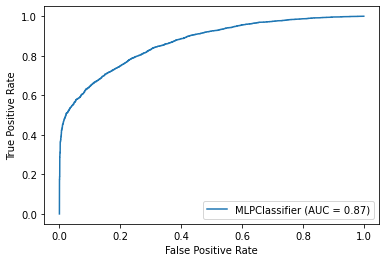

In [18]:
hidden_layers = (50,50,50)
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=hidden_layers, random_state=1)
mlp.fit(train[feature_list], train['label'])
mlp_predict = mlp.predict(test[feature_list])

MetricsOfReliability(mlp, test[feature_list], test['label'], mlp_predict)

137
1
4369889
[0 1]


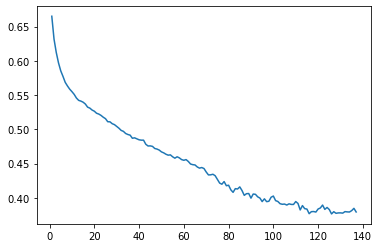

In [26]:
print(mlp.n_iter_)
print(mlp.n_outputs_)
print(mlp.t_)
print(mlp.classes_)
plt.plot(list(range(1,mlp.n_iter_+1)), mlp.loss_curve_)

accuracy = 0.8273354231974922
sensitivity = 0.859653404930437
specificity = 0.7931923671995874
166
1
5294902
[0 1]
0.3535077199815778


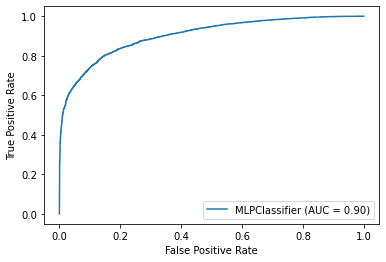

In [38]:
hidden_layers = (50,50)
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=hidden_layers, max_iter=800, random_state=1)
mlp.fit(train[feature_list], train['label'])
mlp_predict = mlp.predict(test[feature_list])

MetricsOfReliability(mlp, test[feature_list], test['label'], mlp_predict)

print(mlp.n_iter_)
print(mlp.n_outputs_)
print(mlp.t_)
print(mlp.classes_)
print(mlp.best_loss_)

accuracy = 0.7860815047021944
sensitivity = 0.7734927996094704
specificity = 0.7993811242908716


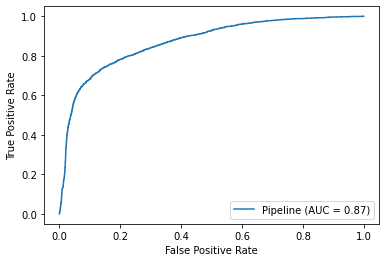

In [13]:
#rbf SVM fit and predict
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_rbf.fit(train[feature_list], train['label'])
svm_predict = svm_rbf.predict(test[feature_list])

MetricsOfReliability(svm_rbf, test[feature_list], test['label'], svm_predict)

accuracy = 0.8644514106583072
sensitivity = 0.9248230412496949
specificity = 0.8006704486848891


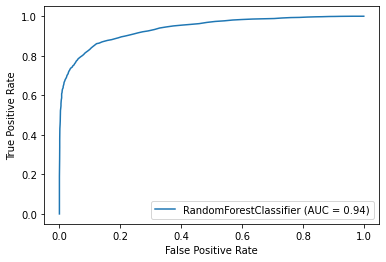

In [15]:
rf = RandomForestClassifier()
rf.fit(train[feature_list], train['label'])
rf_predict = rf.predict(test[feature_list])

MetricsOfReliability(rf, test[feature_list], test['label'], rf_predict)